###**About the Yulu Company**

**Yulu is a company in india that provides electric cycles you can rent using a mobile app.These cycles are great for short trips -- like going from metro station to your office or home. They're trying to reduce traffic and pollution by offering this easy and eco-friendly way to travel.**
**You can find yulu cycles at metro stations, bus stops, tech parks, and housing areas, making it easy for people to pick up and drop off the cycles wherever needed.**

###**What Problem is Yulu Facing**
- Yulu has noticed that fewer people are using their electric cycles, which is causing a drop in their revenue(earnings).
- So, they asked a team of data analysts to help figure out.
  - **What factors affect how many people rent Yulu cycles?**
  - **Can we use data to predict when demand will be high or low?**

###**What Do You Need To Do?**
- Which things affect cycle demand?
  - Does demand change on working days vs weekends?
  - Does weather or season matter?
  - Does temperature or wind speed make a difference?
- Use data and statistics to test your ideas:
  - Use a T-test to see if more people rent cycles on working days than non-working days.
  - Use ANOVA to see if different seasons or weather types affect how many people rent cycles.
  - Use a Chi-square test to check if weather and season are connected.

###**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

###**IMPORTING DATASET**

In [ ]:
df = pd.read_csv('bike_sharing.txt')

###**PREVIEW THE DATA**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


###**DATASET**

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#Observation:
- The dataset contains 10,886 rows and 12 columns.
- Each row represents bike rental data for a specific hour.
- The Target column is 'Count'
- Casual + registered = count
- Weather, season, and workingday are important factors that may influence rentals.
- Columns like temp, humidity, windspeed are continous variables - useful for trends
- Data spans over two years(2011-2012)

**The Goal is to understand what factors affect the number of electric bikes rented.**

###**Information of the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#Observation:
- The dataset has 10,886 rows and 12 columns
- No missing values
- There are 3 types of data - Object, float, int.
- Convert datetime to datetime type to extract hour, day, month.
- Analyze how temperature, weather, or holidays affect the count.

###**Shape, Size, & Dimensions**

In [ ]:
print(f"The shape of the dataset      : {df.shape}")
print(f"The size of the dataset       : {df.size}")
print(f"The dimensions of the dataset : {df.ndim}")

The shape of the dataset      : (10886, 12)
The size of the dataset       : 130632
The dimensions of the dataset : 2


###**To Get All Attributes**

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

###**Data Types of all Attributes**

In [ ]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


###**Data Preprocessing**

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['holiday'] = df['holiday'].astype('category')

In [ ]:
df.dtypes

,0
datetime,datetime64[ns]
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['weekday'] = df['datetime'].dt.weekday

###**Statistical Summary of The Data**

In [ ]:
df.describe(include = 'category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


#Observation:
- Most rides happened on non-holidays and working days.
- Good weather(weather = 1) was the most common condition.
- Season 4 (Mostly likely winter) had the highest number of entries.

In [ ]:
df.describe(include = 'int64')

,humidity,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000
mean,61.886460,36.021955,155.552177,191.574132
std,19.245033,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.000000,1.000000
25%,47.000000,4.000000,36.000000,42.000000
50%,62.000000,17.000000,118.000000,145.000000
75%,77.000000,49.000000,222.000000,284.000000
max,100.000000,367.000000,886.000000,977.000000


#Observation:
- Registered users contribute more to total demand than casual users
- Humidity mostly stays between 47% to 77%, which is quite normal.
- Total rides per hour mostly lie between 42 and 284.
- There are some extreme values in casual and registered usage.

In [ ]:
df.describe(include = 'datetime')

,datetime
count,10886
mean,2011-12-27 05:56:22.399411968
min,2011-01-01 00:00:00
25%,2011-07-02 07:15:00
50%,2012-01-01 20:30:00
75%,2012-07-01 12:45:00
max,2012-12-19 23:00:00


#Observation:
- The dataset contains 10,886 hourly records.
- Data covers time period from January 1, 2011 to December 19, 2012.
- The midpoint 50% of the data is around January 1, 2012

###**CHECKING NULL VALUES**

In [ ]:
df.isnull().sum().sum()

np.int64(0)

###**VALUE COUNTS**

**SEASON**

In [ ]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


#Observation:
- The season column is a categorical variable, it contains 4 categories
- 1 represents Spring season
- 2 represents Summer Season
- 3 represents Fall Season
- 4 represents Winter Season

**HOLIDAY COLUMN**

In [ ]:
df['holiday'].value_counts()

,count
holiday,
0,10575
1,311


#Observation:
- There are 2 categories in holiday column :- 0, 1
- 0 represents Not a holiday/ working day
- 1 represents Holiday
- Majority of the data is from working day/ Not a Holiday
- Working day = 97%, Holiday = Approx. 3%

**WORKINGDAY COLUMN**

In [ ]:
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


#Observation:
- The working day column is categorical variables. It contains two categories they are 0 & 1
- 0 represents Non-working day/ Holiday
- 1 represents Working day
- Majority of the data comes from working day is 68% and Holiday 32%

**WEATHER COLUMN**

In [ ]:
df['weather'].value_counts(normalize=True)

,proportion
weather,
1,0.660665
2,0.260334
3,0.078909
4,0.000092


#Observation:
- The weather column is a categorical variable representing the type of weather on a given day
- It contains 4 categories as
- 1 represents partly cloudy or few clouds
- 2 represents Broken clouds
- 3 represents Light rain/ snow or Thunderstrom
- 4 represents Heavy Rain, Ice pallets

###**WEATHER CONDITION DISTRIBUTION**

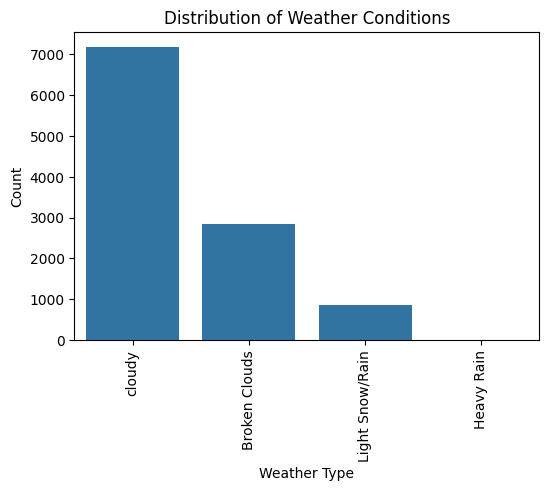

In [ ]:
# Create value counts
weather_counts = df['weather'].value_counts().sort_index()

weather_labels = {
    1 : 'cloudy',
    2 : 'Broken Clouds',
    3 : 'Light Snow/Rain',
    4 : 'Heavy Rain'
    }

# Map index values to labels using pandas Series and map()
mapped_labels = pd.Series(weather_counts.index).map(weather_labels)

plt.figure(figsize=(6,4))
sns.barplot(x = weather_counts.index, y = weather_counts.values)
plt.xticks(ticks = range(len(weather_counts)), labels = mapped_labels, rotation = 90)
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.title('Distribution of Weather Conditions')
plt.show()

###**SEASON DISTRIBUTION**

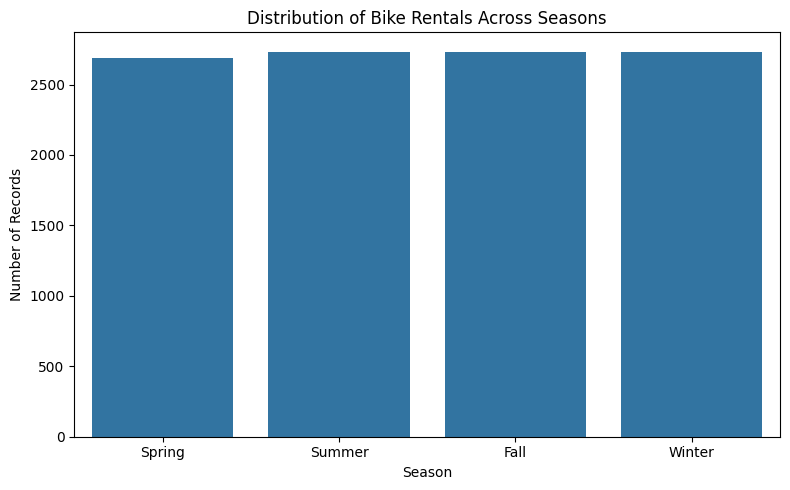

In [ ]:
# Mapping encoded values to actual season names
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_mapping)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='season_name', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Distribution of Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

In [ ]:
weather_mapping = {1:'Cloudy',2:'Broken clouds',3:'Light Rain/snow',4:'Heavy Rainfall'}
df['weather_name'] = df['weather'].map(weather_mapping)

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,weekday,season_name,weather_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1,2011,5,Spring,Cloudy
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,2011,5,Spring,Cloudy
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1,2011,5,Spring,Cloudy
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1,2011,5,Spring,Cloudy
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1,2011,5,Spring,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,12,2012,2,Winter,Cloudy
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,19,12,2012,2,Winter,Cloudy
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,19,12,2012,2,Winter,Cloudy
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,19,12,2012,2,Winter,Cloudy


In [ ]:
df['weather_name'].value_counts()

,count
weather_name,
Cloudy,7192
Broken clouds,2834
Light Rain/snow,859
Heavy Rainfall,1


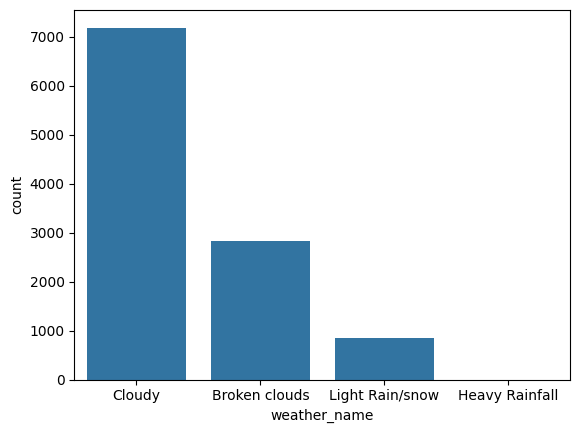

In [ ]:
sns.countplot(data=df, x = df['weather_name'])
plt.show()

###**DISTRIBUTION OF NUMERICAL FEATURES**

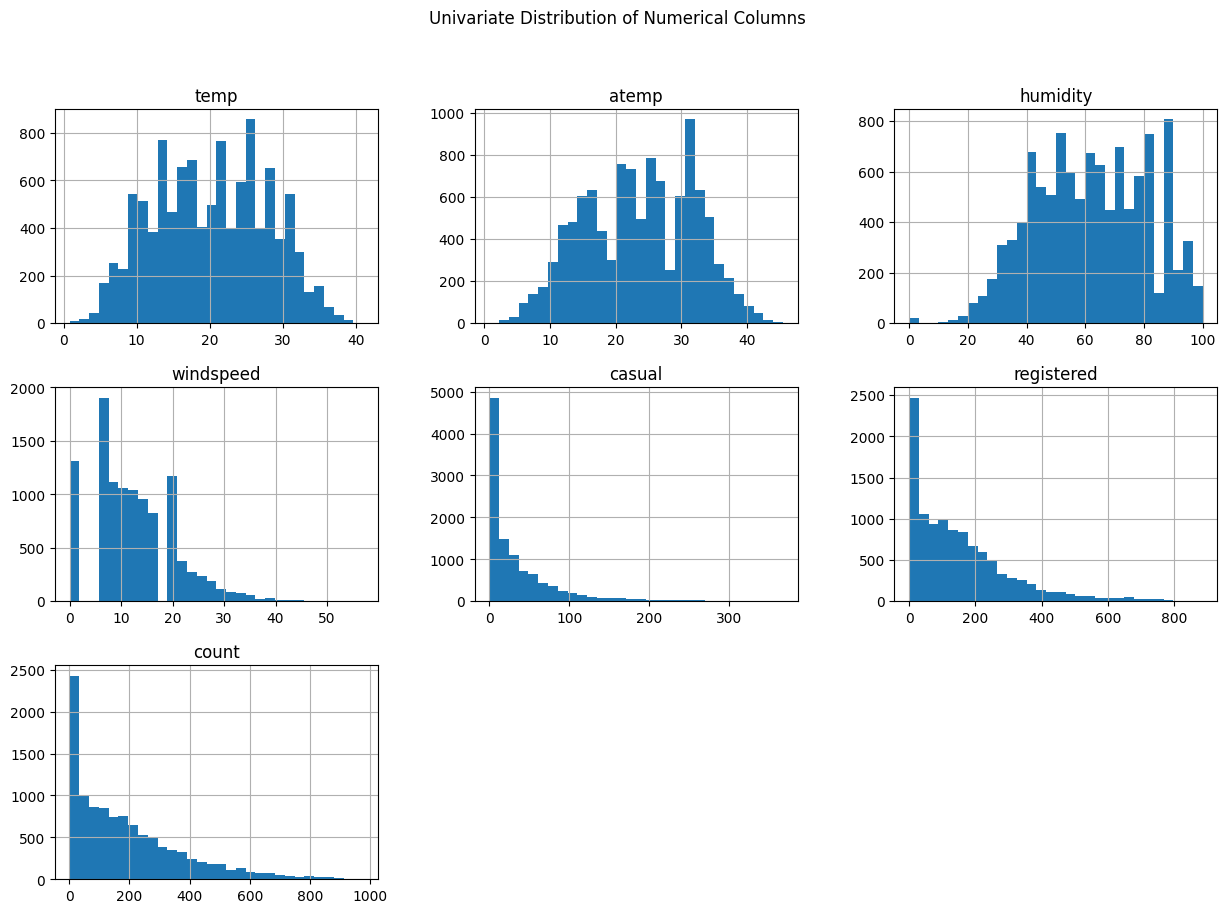

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Univariate Distribution of Numerical Columns")
plt.show()

#Observation:
- Temp & atemp have a roughly normal distribution
- Humidity slight right skew
- Windspeed and casual users, registered users & Total count are right-skewed.

###**HISTOGRAMS**

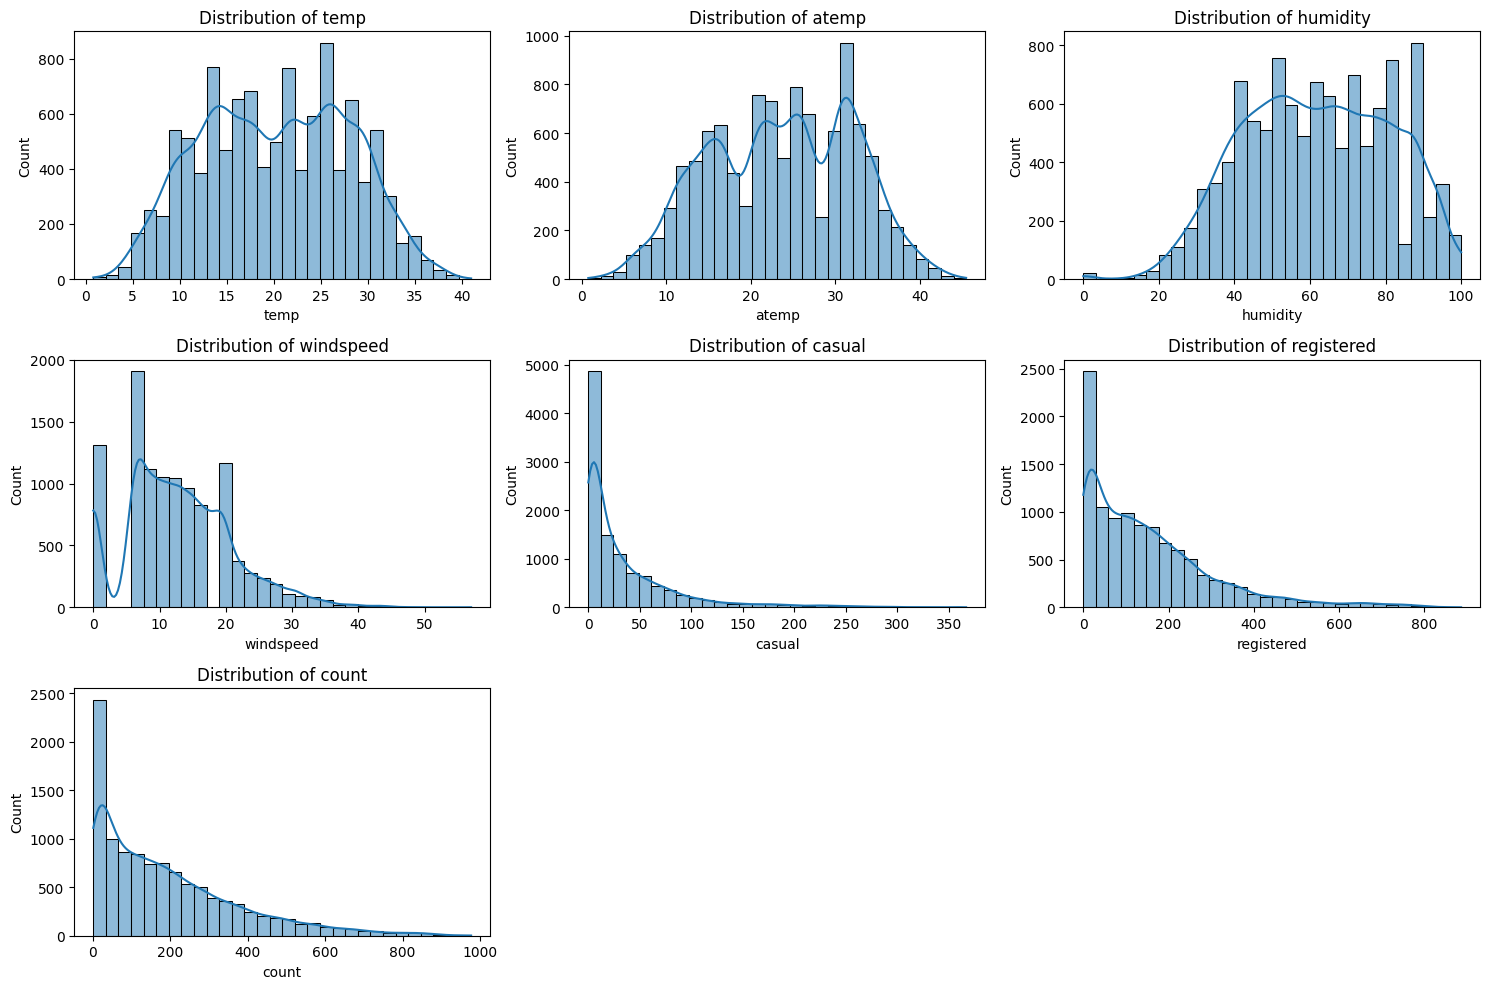

In [ ]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

###**COUNT PLOTS**

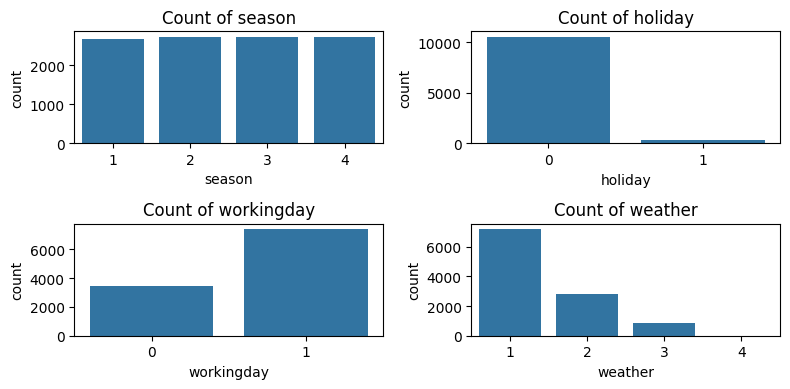

In [ ]:
categorical_cols = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(8,4))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

###**DATETIME ANALYSIS**

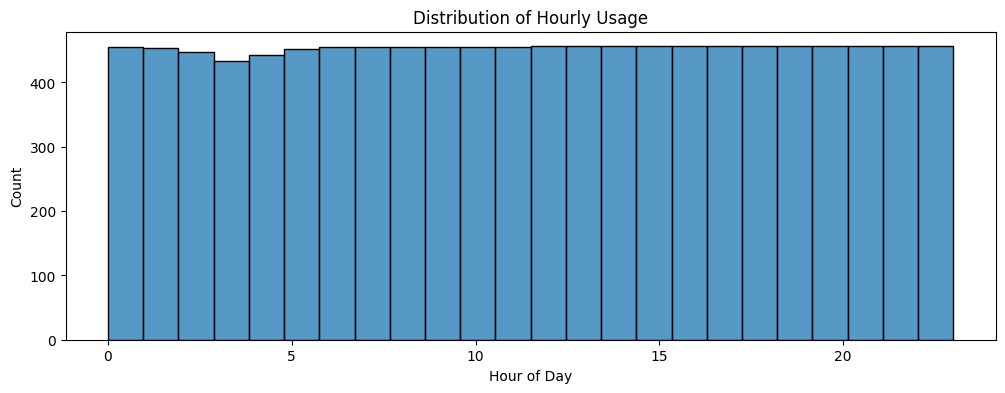

In [ ]:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df['month'] = pd.to_datetime(df['datetime']).dt.month

# Plot hourly usage
plt.figure(figsize=(12, 4))
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Distribution of Hourly Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

###**BIVARIATE ANALYSIS**

###**WORKING DAY VS. COUNT**

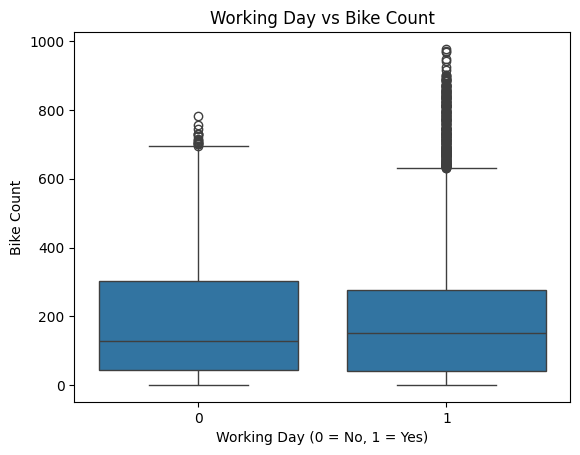

In [ ]:
sns.boxplot(data=df, x='workingday', y='count')
plt.title('Working Day vs Bike Count')
plt.xlabel('Working Day (0 = No, 1 = Yes)')
plt.ylabel('Bike Count')
plt.show()

#Observation:
- More Bikes are rented on working days.
- The median is a little higher for working days. This mean people rent more bikes on weekdays.
- Both working and non-working days have outliers.It means very high bike rentals.
- Bike use is more spread out on Holidays, may be Holidays, weekends, outing.

###**SEASON VS COUNT**

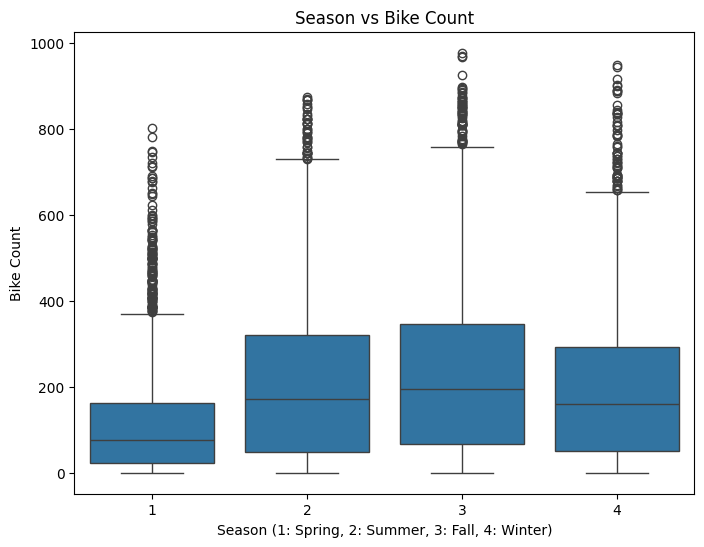

In [ ]:
plt.figure(figsize = (8,6))
sns.boxplot(data=df, x='season', y='count')
plt.title('Season vs Bike Count')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Bike Count')
plt.show()

#Observation:
- Fall and summer are peak seasons for renting bikes, likely due to present weather.
- Spring has the lowest uasge, possibly due to unpredictable weather or rain.
- Winter shows moderate bike use.
- Rentals change across seasons, so season has an effect on number of bikes rented.

###**WEATHER VS COUNT**

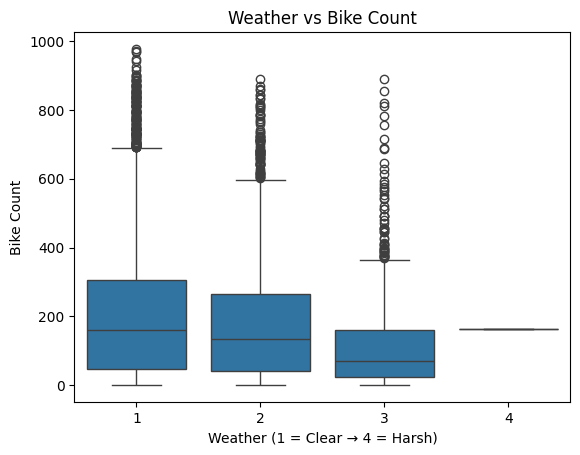

In [ ]:
sns.boxplot(data=df, x='weather', y='count')
plt.title('Weather vs Bike Count')
plt.xlabel('Weather (1 = Clear → 4 = Harsh)')
plt.ylabel('Bike Count')
plt.show()

#Observation:
- The boxplot compares bike rentals based on different weather conditions:
  - 1 = Clear/Partly Cloudy
  - 2 = Mist/Cloudy
  - 3 = Light Snow/Light Rain
  - 4 = Heavy Rain/Snow/Storm
- Clear weather (1) shows the highest bike rentals, both in median and range.
- As the weather becomes worse (from 2 → 4), the number of rentals drops.
- Weather type 3 has a much lower median and tighter distribution, meaning people rent less in poor weather.
- Weather 4 (harsh conditions) has very few records and very low bike counts, which is expected.



##**Hypothesis Testing**

##**HYPOTHESIS TESTING**
- Hypothesis testing is a statistical method used to make decisions about a population based on sample data.
- Start with two assumptions:
  - Null hypothesis(H0)
  - Alternative hypothesis(H1)
- Make a claim (null vs alternative).
- Collect data.
- Run a statistical test
- Get a p-value:
  - If p-value < 0.05 → reject the null → there's a real difference.
  - If p-value ≥ 0.05 → keep the null → no significant difference.

##**Checking whether the average number of bikes rented is significantly different between working days and holidays AS non-working days**

- **Null Hypothesis (H₀):** There is no difference in average bike count between working days and non-working days.
- **Alternative Hypothesis (H₁):** There is a significant difference in average bike count between working days and non-working days.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
working = df[df['workingday'] == 1]['count']
non_working = df[df['workingday'] == 0]['count']

In [ ]:
working.mean()

np.float64(193.01187263896384)

In [ ]:
non_working.mean()

np.float64(188.50662061024755)

In [ ]:
t_stat, p_val = ttest_ind(working, non_working, alternative = 'greater')
print(t_stat)
print(p_val)
if p_val < 0.05:
    print("reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

1.2096277376026694
0.11322402113180674
fail to reject the null hypothesis


#Observation:
- There is no significant difference in the average number of bike rentals between working days anfd non-working days
- Whether it's a working day or Holiday Does'nt have a strong impact on how many bikes are rented.

##**EFFECT OF SEASON ON BIKE RENTALS**

**Goal:- To check whether the number of electric cycles rented is the same or different across different seasons**

###**One-Way ANOVA(Analysis of Varience)**
- Compares the means of more than two groups
- In this case, four seasons to determine if at least one group mean is siginificantly different.

##**Hypotheses:**
- **Null Hypothesis (H₀):** The average number of bikes rented is the same across all seasons.
- **Alternative Hypothesis (H₁)**: At least one season has a significantly different average bike rental count.

###**ASSUMPTIONS**
- The samples are independent
- Each group is normally distributed
- All groups have equal variance

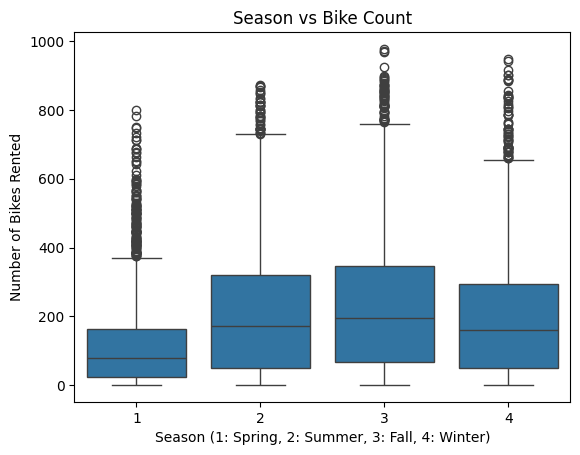

In [ ]:
sns.boxplot(data=df, x='season', y='count')
plt.title("Season vs Bike Count")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Number of Bikes Rented")
plt.show()

- Since data is not normally distributed
- Levene's test shows unequal variances, it means that one Anova's key assumptions is violated

In [ ]:
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

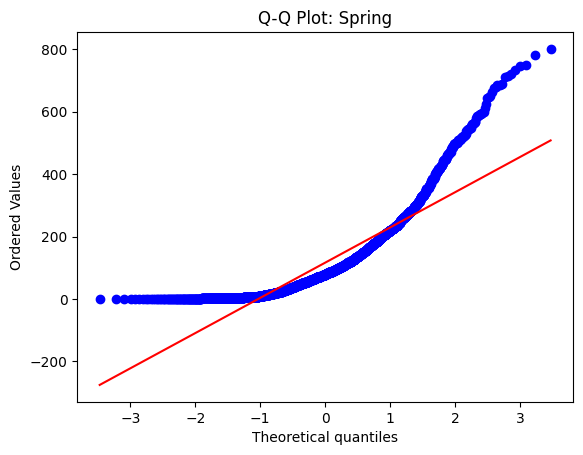

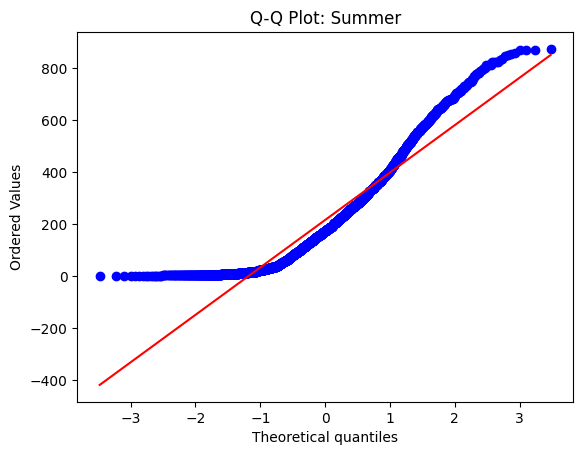

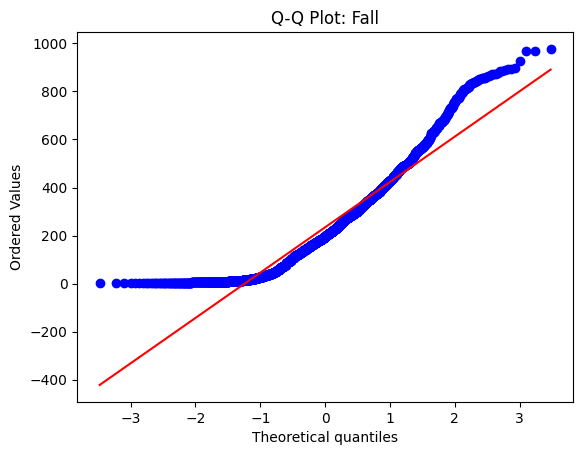

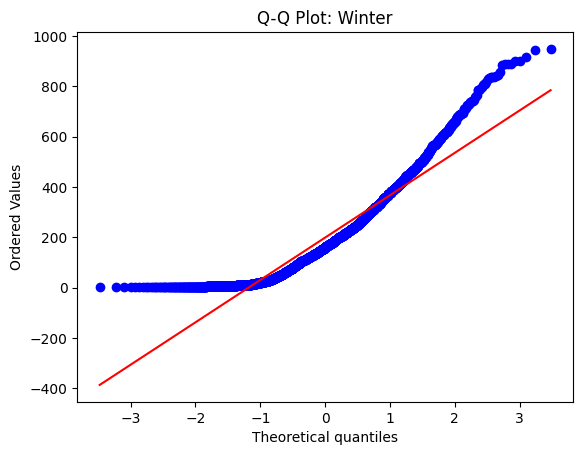

In [ ]:
from scipy.stats import probplot
for season_data, label in zip([spring, summer, fall, winter],['Spring','Summer','Fall','Winter']):
  probplot(season_data, dist = 'norm',plot = plt)
  plt.title(f'Q-Q Plot: {label}')
  plt.show()

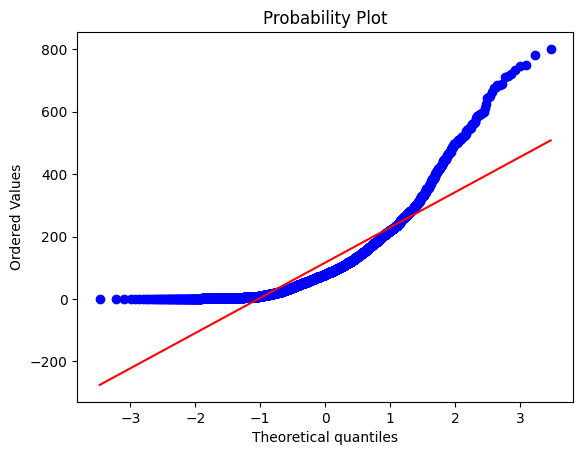

In [ ]:
from scipy.stats import probplot
probplot(spring, dist = 'norm', plot = plt)
plt.show()

**Standard ANOVA is not reliable**

##**Kruskal-Wallis Test**
- Use this if data is also not normally distributed (fails Shapiro-Wilk).
- It’s a non-parametric version of ANOVA → does not assume normality or equal variance.
- Tests if medians differ among groups.

In [ ]:
from scipy.stats import kruskal

stat, p_value = kruskal(spring, summer, fall, winter)
stat, p_value

if p_value < 0.05:
  print('Atleast one group is significantly different')
else:
  print('No significant difference among groups')

Atleast one group is significantly different


#Observation:
- There is a statistically significant difference in bike rental counts between at least one pair of seasons (Spring, Summer, Fall, Winter).
- Seasonal effects do influence user behavior in renting electric bikes.

#**Hypothesis Test: Weather vs. Bike Rentals**

###**Check if the number of electric cycles rented differs based on different weather conditions**

###**Hypothesis**
- **Null Hypothesis(H0):** The median number of cycles rented in the same across all weather conditions.
- **Alternate Hypothesis(H1):** Atleast one weather condition leads to a different median cycle rental count.

###**Check Assumptions**
- Shapiro-Wilk Test and QQ Plot for checking normality
- Levene's Test for checking equal variances.

But if assumptions are violated (non-normality, unequal variances), we’ll use a non-parametric test:
- Kruskal-Wallis Test
  - for comparing medians across 3+ groups (like weather types).

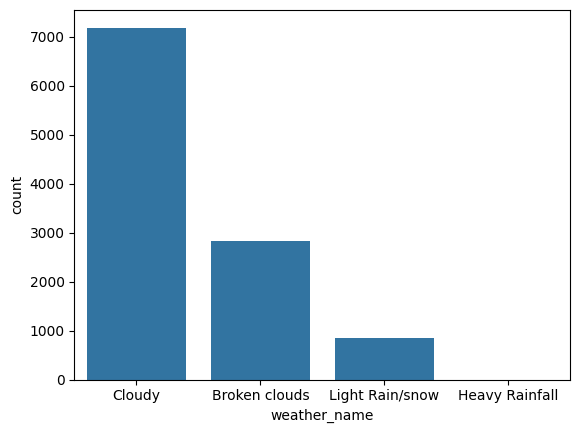

In [ ]:
sns.countplot(data=df, x = df['weather_name'])
plt.show()

In [ ]:
good = df[df['weather_name']=='Cloudy']['count']
good.mean()

np.float64(205.23679087875416)

In [ ]:
Moderate = df[df['weather_name']=='Broken clouds']['count']
Moderate.mean()

np.float64(178.95553987297106)

In [ ]:
Bad = df[df['weather_name'] == 'Light Rain/snow']['count']
Bad.mean()

np.float64(118.84633294528521)

In [ ]:
extreme = df[df['weather_name'] == 'Heavy Rainfall']['count']
extreme.mean()

np.float64(164.0)

- All weather group have different means

##**Check Normality Using Q-Q Plot and Shapiro-Wilk Test**

**WHAT IS Q-Q PLOT**
- It is a graphical tool to check if your data follows a normal distribution
- It plots your data’s quantiles (percentiles) vs theoretical normal quantiles.
- If the points fall roughly in a straight diagonal line, the data is normally distributed.
- If the points curve or deviate, the data is not normally distributed.

In [ ]:
from scipy.stats import probplot

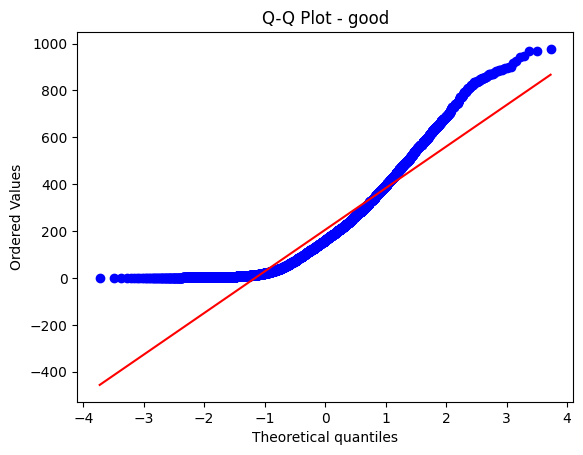

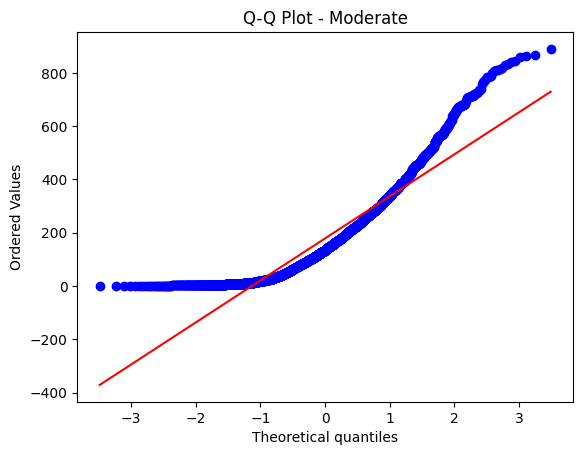

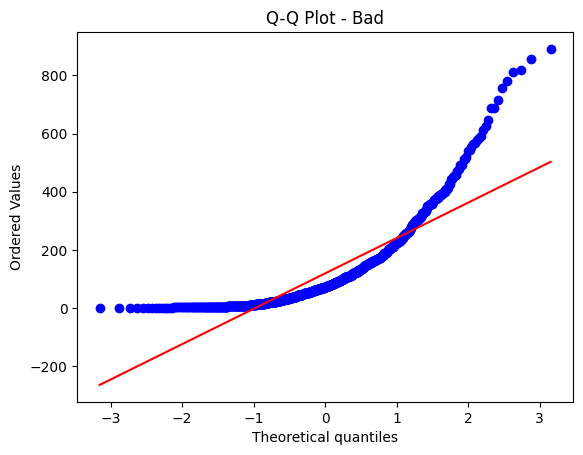

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10919: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10933: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10936: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


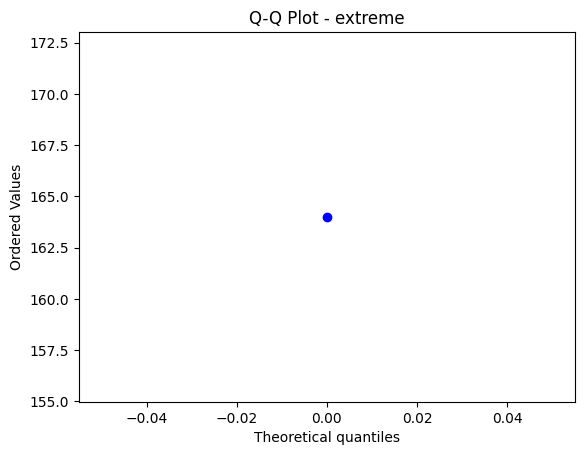

In [ ]:
# Q-Q plots
for weather_data, label in  zip([good, Moderate, Bad, extreme], ['good','Moderate', 'Bad', 'extreme']):
  probplot(weather_data, dist="norm", plot=plt)
  plt.title(f"Q-Q Plot - {label}")
  plt.show()


- Data is not normally distributed.
- One-way ANOVA Assumption not met.

##**Apply Krushkal-Wallis Test**

- It's a non parametric test used when ANOVA assumptions are violated. it compares medians across multiple groups.

In [ ]:
from scipy.stats import kruskal
stats, p_value = kruskal(good,Bad,Moderate, extreme)
stats, p_value

(np.float64(205.00216514479087), np.float64(3.501611300708679e-44))

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one weather group is different")
else:
    print("Fail to reject the null hypothesis: No significant difference across weather groups")

Reject the null hypothesis: At least one weather group is different


#Observation:
- There is a statistically significant difference in the number of electric cycles rented across different weather conditions.
- This means at least one weather group (like Good, Moderate, Bad, Extreme) leads to a different pattern in rentals compared to others.


#**Weather vs. Season**

- To check if weather is dependent on the season, we can perform a Chi-Square Test of Independence.
- This test evaluates whether two categorical variables are associated with each other.

###**What is the Chi-Square Test**
- The Chi-Square Test of Independence is a statistical test used to determine whether there is a significant relationship between two categorical variables.



###**Hypotheses**
- **H₀ (Null Hypothesis):**
   - Weather is independent of the season.

- **H₁ (Alternative Hypothesis):**
   - Weather is dependent on the season.

In [ ]:
# Contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

Chi2 Statistic: 49.158655596893624
P-value: 1.549925073686492e-07


In [ ]:
alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis: Weather depends on the season.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between weather and season.")

Reject the null hypothesis: Weather depends on the season.


#Observation:
- Weather patterns change with seasons
- There is a statistically significant association between weather and season.
- This means that the type of weather is not randomly distributed across seasons — it depends on the season.



#**Insights** (Top 10)
- **Seasonal Trends:**
  - Fall (Season 3) records the highest average rentals, while Spring (Season 1) sees the lowest.
  - Season significantly affects user behavior.

- **Weather Influence:**
  - Clear weather days see the highest usage, while extreme conditions drop rentals.
  - Weather has a strong inverse impact on demand.

- **Working Days vs. Non-working Days:**
  - Average rentals on working days vs on non-working days.- Suggests dominant commuter usage.

- **Holiday Impact:**
  - Rentals decrease on holidays compared to non-holidays, indicating lower travel needs.

- **Registered vs Casual Users:**
  - 80% of users are registered, showcasing high repeat user engagement.

- **Time of Day Patterns:**
  - Peak rentals during 8 AM and 5–6 PM confirm commuter usage patterns.

- **Temperature Relation:**
  - Rentals increase with temperature up to a threshold (~25°C), then slightly decline due to discomfort.

- **Chi-Square Result:**
  - Weather is dependent on season (p < 0.05), confirming environmental factors are interconnected.

##**Recommendations**
- Increase bike supply during Fall to match rising demand.
- Launch Spring discounts to boost usage in the lowest season.
- Run weather-based push notifications to alert users on optimal riding days.
- Deploy more bikes in business districts during work hours.
- Offer weekend bonuses or referral programs to attract more casual/holiday riders.
- Introduce loyalty programs for registered users to retain core user base.
- Add heatmap-based fleet optimization using time-of-day and season insights.
- Improve visibility and incentives on poor weather days for adventurous riders.
- Use humidity and temperature thresholds to plan predictive maintenance and reduce breakdowns.
- Align fleet deployment strategies based on seasonal weather forecasts.



##**Conclusion**
- The Yulu electric cycle rental data analysis reveals that user behavior is significantly influenced by season, weather, and day type.
- Most users are working professionals who use the service for commuting on working days, especially during peak office hours.
- Weather conditions like clear skies and moderate temperatures promote higher usage, while extremes like high humidity or strong winds deter users.
- The statistical tests (T-tests, ANOVA, Chi-square) validate these patterns with significance levels confirming meaningful differences and dependencies.
- By leveraging these insights, Yulu can improve resource allocation, user satisfaction, and operational planning, ensuring smarter, more data-driven business decisions.